# Exploration Notebook for usagers/individuals 2019 to 2024

# 1. Load libraries and dataframes

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [29]:
usagers_2019 = pd.read_csv('data/usagers-2019.csv', sep=';')
usagers_2020 = pd.read_csv('data/usagers-2020.csv', sep=';')
usagers_2021 = pd.read_csv('data/usagers-2021.csv', sep=';')
usagers_2022 = pd.read_csv('data/usagers-2022.csv', sep=';')
usagers_2023 = pd.read_csv('data/usagers-2023.csv', sep=';')
usagers_2024 = pd.read_csv('data/usagers-2024.csv', sep=';')

# 2. checking datasets for datatypes, shapes, missing values, column names etc.


In [30]:
usagers_2019.info()
usagers_2020.info()
usagers_2021.info()
usagers_2022.info()
usagers_2023.info()
usagers_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132977 entries, 0 to 132976
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Num_Acc      132977 non-null  int64 
 1   id_vehicule  132977 non-null  object
 2   num_veh      132977 non-null  object
 3   place        132977 non-null  int64 
 4   catu         132977 non-null  int64 
 5   grav         132977 non-null  int64 
 6   sexe         132977 non-null  int64 
 7   an_nais      132977 non-null  int64 
 8   trajet       132977 non-null  int64 
 9   secu1        132977 non-null  int64 
 10  secu2        132977 non-null  int64 
 11  secu3        132977 non-null  int64 
 12  locp         132977 non-null  int64 
 13  actp         132977 non-null  object
 14  etatp        132977 non-null  int64 
dtypes: int64(12), object(3)
memory usage: 15.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105295 entries, 0 to 105294
Data columns (total 15 columns):
 #   Column 

# first insights: 
1.new column "id_usager" in 2021. did not exist in 2019, 2020. could be useful for duplicates.but no relevance for later steps.
2.missing values in column 'an_nais'/'individual_birthyear'
3.three different datatypes (object, int64,float64)


In [41]:
dfs = {
    "2019": usagers_2019,
    "2020": usagers_2020,
    "2021": usagers_2021,
    "2022": usagers_2022,
    "2023": usagers_2023,
    "2024": usagers_2024,
}
for year, df in dfs.items():
    print(f"--- {year} | shape: {df.shape} ---")
    display(df.head(3))


--- 2019 | shape: (132977, 15) ---


,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,201900000001,138 306 524,B01,2,2,4,2,2002,0,1,0,-1,-1,-1,-1
1,201900000001,138 306 524,B01,1,1,4,2,1993,5,1,0,-1,-1,-1,-1
2,201900000001,138 306 525,A01,1,1,1,1,1959,0,1,0,-1,-1,-1,-1


--- 2020 | shape: (105295, 15) ---


,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202000000001,154 742 274,B01,1,1,1,1,1983,5,1,0,-1,-1,-1,-1
1,202000000001,154 742 275,A01,1,1,3,1,1982,5,2,6,-1,-1,-1,-1
2,202000000002,154 742 273,A01,1,1,1,1,1997,1,8,0,-1,-1,-1,-1


--- 2021 | shape: (129248, 16) ---


,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202100000001,267 638,201 764,B01,1,1,3,1,2000.0,1,0,9,-1,0,0,-1
1,202100000001,267 639,201 765,A01,1,1,1,1,1978.0,1,1,-1,-1,0,0,-1
2,202100000002,267 636,201 762,A01,1,1,4,1,1983.0,0,1,-1,-1,0,0,-1


--- 2022 | shape: (126662, 16) ---


,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202200000001,1 099 700,813 952,A01,1,1,3,1,2008.0,5,2,8,-1,-1,-1,-1
1,202200000001,1 099 701,813 953,B01,1,1,1,1,1948.0,5,1,8,-1,-1,-1,-1
2,202200000002,1 099 698,813 950,B01,1,1,4,1,1988.0,9,1,0,-1,0,0,-1


--- 2023 | shape: (125789, 16) ---


,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202300000001,203 851 184,155 680 557,A01,1,1,4,1,1978.0,5,2,0,-1,-1,-1,-1
1,202300000002,203 851 182,155 680 556,A01,1,1,1,2,1997.0,9,1,0,-1,-1,-1,-1
2,202300000002,203 851 183,155 680 556,A01,10,3,3,1,1997.0,9,0,-1,-1,2,3,1


--- 2024 | shape: (125187, 16) ---


,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202400000001,203 988 581,155 781 758,A01,1,1,3,1,2003.0,2,1,-1,-1,-1,-1,-1
1,202400000001,203 988 582,155 781 759,B01,1,1,1,1,1997.0,4,1,-1,-1,-1,-1,-1
2,202400000002,203 988 579,155 781 757,A01,10,3,3,2,1927.0,5,0,-1,-1,3,3,1


interpretation: 
- change type of an_nais. so all years are of type (int64)?
- change categorical columns to: 
#for col in ["secu1", "grav", "catu", "sexe"] to strings?
# if "an_nais" in df.columns:
# df["an_nais"] = pd.to_numeric(df["an_nais"], errors="coerce")
#   # 1) normalize -1 to NaN for known coded missing values
  #  for col in ["secu1", "grav", "an_nais", "catu", "sexe"]:
    #    if col in df.columns:
     #       df[col] = df[col].replace(-1, np.nan)

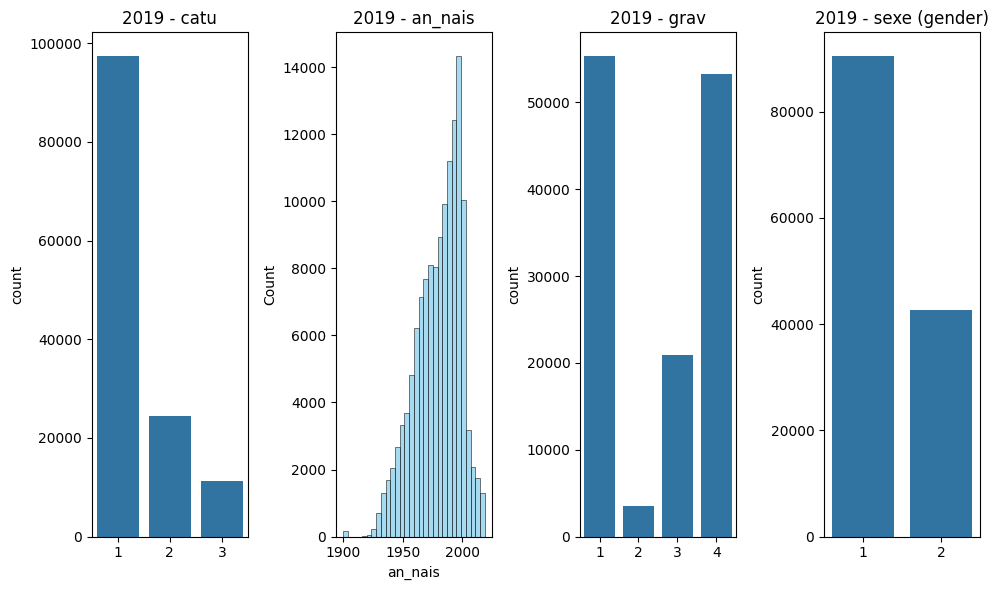

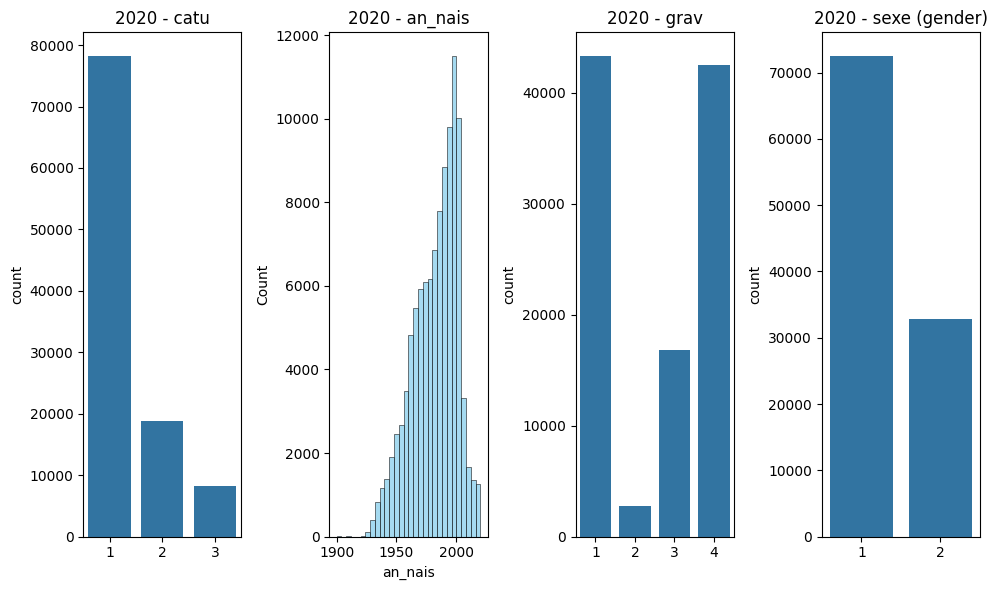

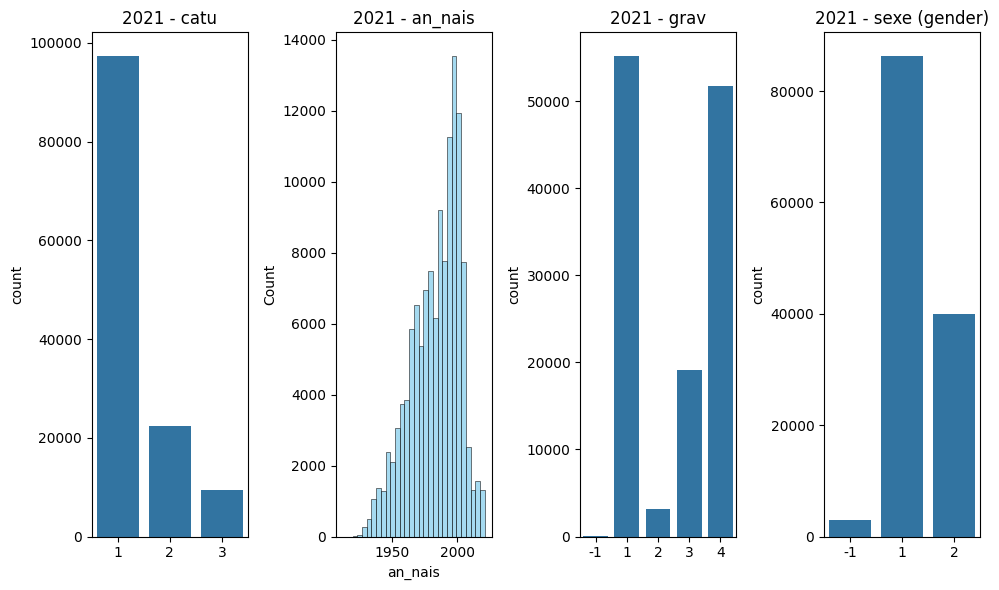

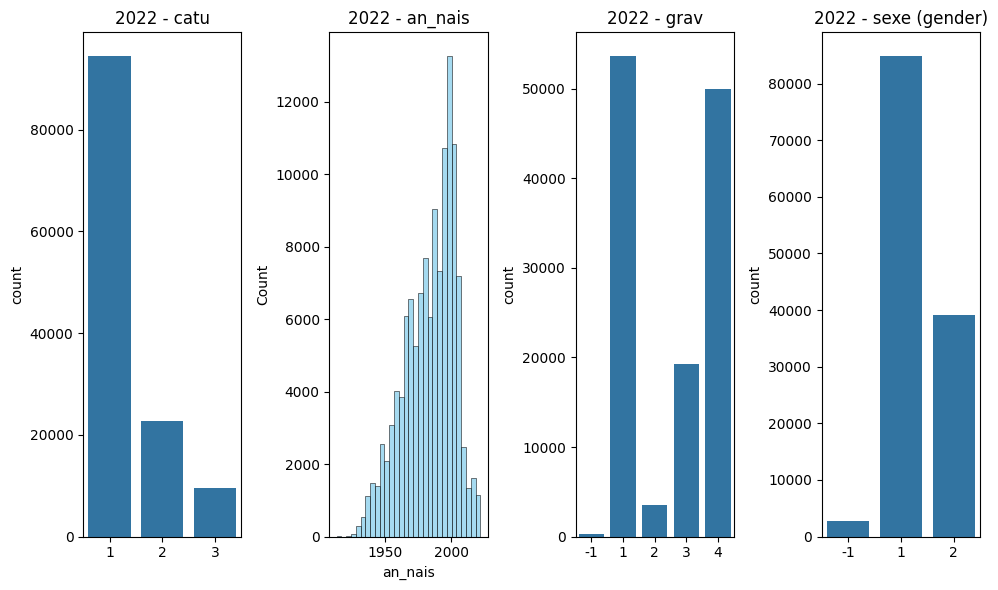

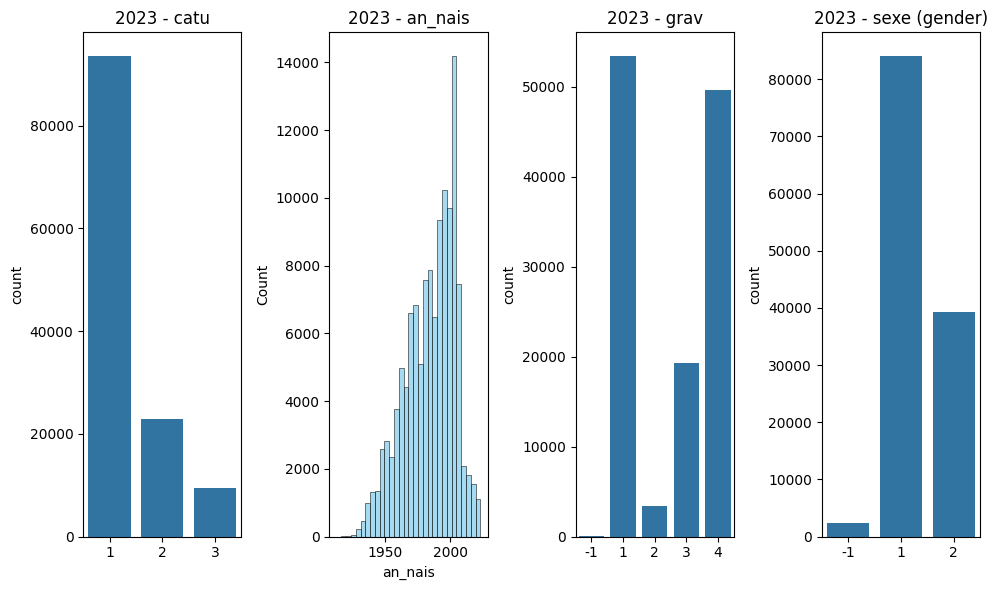

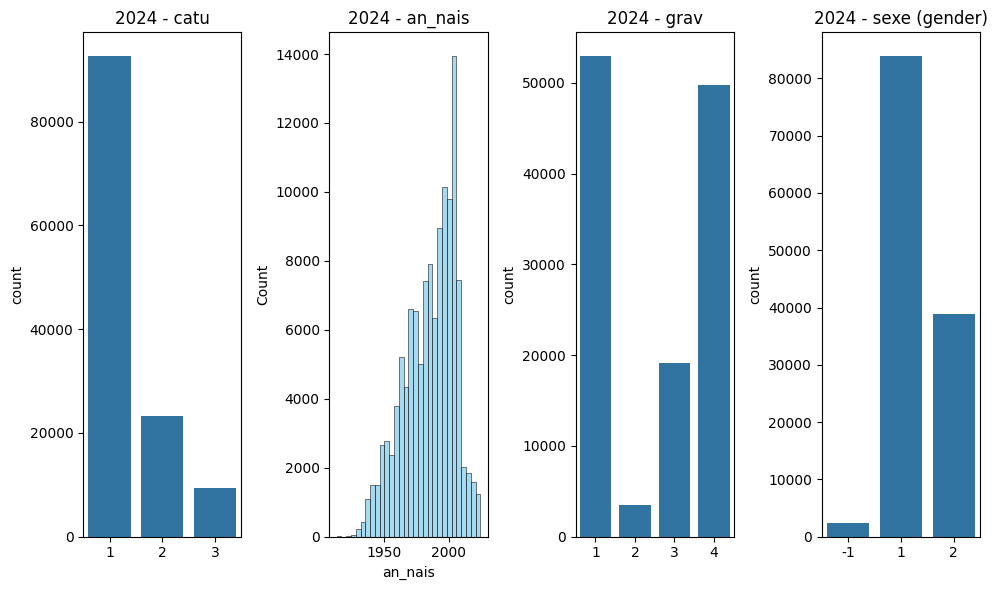

In [42]:
years = ['2019','2020','2021','2022','2023','2024']

for year in years:
    df = dfs[year]
    plt.figure(figsize=(10,6))
    # 'catu' column
    plt.subplot(1, 4, 1)
    if "catu" in df.columns:
        sns.countplot(x="catu", data=df)
        plt.title(f"{year} - catu")
    else:
        plt.text(0.5, 0.5, "catu missing", ha="center")
        plt.title(f"{year} - catu")
    plt.xlabel("")
    plt.ylabel("count")
    # 'an_nais' column
    plt.subplot(1, 4, 2)
    if "an_nais" in df.columns:
        sns.histplot(df['an_nais'], bins=30, color="skyblue")
        plt.title(f"{year} - an_nais")
    else:
        plt.text(0.5, 0.5, "an_nais missing", ha="center")
        plt.title(f"{year} - an_nais")
        plt.xlabel("")
        plt.ylabel("count")
    # 'grav' column
    plt.subplot(1, 4, 3)
    if "grav" in df.columns:
        sns.countplot(x="grav", data=df)
        plt.title(f"{year} - grav")
    else:
        plt.text(0.5, 0.5, "grav missing", ha="center")
        plt.title(f"{year} - grav")
    plt.xlabel("")
    plt.ylabel("count")
    # 'sexe' column
    plt.subplot(1, 4, 4)
    if "sexe" in df.columns:
        sns.countplot(x="sexe", data=df)
        plt.title(f"{year} - sexe (gender)")
    else:
        plt.text(0.5, 0.5, "sexe missing", ha="center")
        plt.title(f"{year} - sexe")
    plt.xlabel("")
    plt.ylabel("count")
    
    plt.tight_layout()
    plt.show()

Interpretation: 
- From 2019 to 2024 we have an imbalance in our target variable. 
- "-1" values in gender should be removed later. 
- overall the distributions seem to be very similar over the years
    - catu -> its logical that driver appears most.
    - grav -> 1-uninjured is most represented in all years. 
    - sexe -> all years more men in accidents than woman.
    - an_nais > distribution is similar in all years. 

# checking duplicates

In [59]:
rows = []
for year in years:
    df = dfs[year]
    total = len(df)
    dup = int(df.duplicated().sum())          # number of duplicate rows (first occurrence not counted)
    pct = round(100 * dup / total, 3) if total > 0 else 0
    rows.append({"year": year, "total_rows": total, "duplicate_rows": dup, "pct_duplicates": pct})
print(rows)


[{'year': '2019', 'total_rows': 132977, 'duplicate_rows': 101, 'pct_duplicates': 0.076}, {'year': '2020', 'total_rows': 105295, 'duplicate_rows': 63, 'pct_duplicates': 0.06}, {'year': '2021', 'total_rows': 129248, 'duplicate_rows': 0, 'pct_duplicates': 0.0}, {'year': '2022', 'total_rows': 126662, 'duplicate_rows': 0, 'pct_duplicates': 0.0}, {'year': '2023', 'total_rows': 125789, 'duplicate_rows': 0, 'pct_duplicates': 0.0}, {'year': '2024', 'total_rows': 125187, 'duplicate_rows': 0, 'pct_duplicates': 0.0}]


Result: 101 rows in 2019 and 63 rows in 2020 are duplicated. should be removed later. no duplicates in other years. 

# Association test for categorical variables
- Cramer's V 


In [60]:
def cramers_v(confusion_matrix):
    chi2, _, _, _ = chi2_contingency(confusion_matrix, correction=False)
    n = confusion_matrix.sum().sum()
    if n == 0:
        return np.nan
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    # bias correction (optional simple form)
    return np.sqrt(max(0, phi2 / min(k-1, r-1)))

# variables to test
pairs_to_test = [
    ("grav", "catu"), # is it there an association between injury severity and user category?
    ("grav", "sexe"), # is it there an association between injury severity and gender
    ("grav", "secu1"), # is it there an association between injury severity and safety equipment used?
    ("catu", "sexe"), # is it there an association between user category and gender
    ("catu", "secu1"), # is it there an association between user category and safety equipment used?
    ("sexe", "secu1") # is it there an association between gender and safety equipment used?
]

# results storage
results = []    
for year in years:
    df = dfs[year]
    for a, b in pairs_to_test:
        if (a not in df.columns) or (b not in df.columns):
            results.append({"year": year, "var1": a, "var2": b, "chi2_p": None, "cramers_v": None})
            continue
        # treat NaN and -1 as categories by converting to string
        s1 = df[a].fillna("NA").astype(str)
        s2 = df[b].fillna("NA").astype(str)
        # create contingency table
        ct = pd.crosstab(s1, s2)
        # skip trivial tables
        if ct.size == 0 or ct.shape[0] < 2 or ct.shape[1] < 2:
            results.append({"year": year, "var1": a, "var2": b, "chi2_p": None, "cramers_v": None})
            continue
        chi2, p, dof, exp = chi2_contingency(ct)
        v = cramers_v(ct)
        results.append({"year": year, "var1": a, "var2": b, "chi2_p": float(p), "cramers_v": float(v)})

res_df = pd.DataFrame(results)
display(res_df.sort_values(["year","var1","var2"]).reset_index(drop=True))

,year,var1,var2,chi2_p,cramers_v
0,2019,catu,secu1,0.000000e+00,0.467420
1,2019,catu,sexe,0.000000e+00,0.234189
2,2019,grav,catu,0.000000e+00,0.183703
3,2019,grav,secu1,0.000000e+00,0.267605
4,2019,grav,sexe,1.383107e-280,0.098704
5,2019,sexe,secu1,0.000000e+00,0.186373
6,2020,catu,secu1,0.000000e+00,0.583075
7,2020,catu,sexe,0.000000e+00,0.225065
8,2020,grav,catu,0.000000e+00,0.170218
9,2020,grav,secu1,0.000000e+00,0.274530


interpretation: 
Most chi‑square tests are significant (p ≈ 0), but effect sizes (Cramér’s V) are generally small; notable exception is catu vs secu1 which shows a strong association — investigate these pairs (contingency tables, percent plots) before feature selection.

--- 2019 | rows: 132977 ---


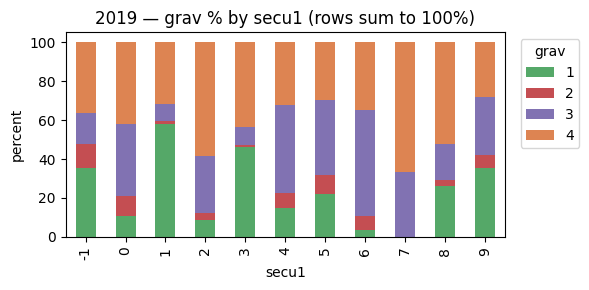

grav,1,2,3,4
secu1,,,,
-1,31,11,14,32
0,785,740,2655,3016
1,46800,1205,7148,25397
2,2143,853,7173,14208
3,430,9,86,406
4,14,7,42,30
5,32,14,55,43
6,4,8,59,38
7,0,0,1,2


--- 2020 | rows: 105295 ---


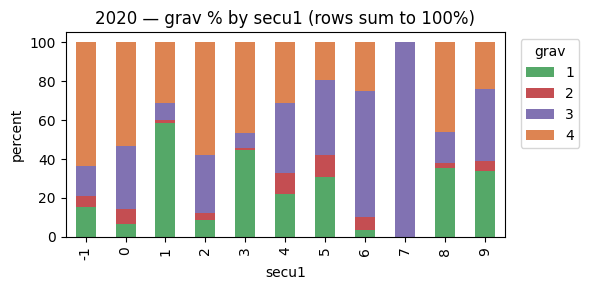

grav,1,2,3,4
secu1,,,,
-1,5,2,5,21
0,683,771,3201,5307
1,36258,935,5444,19472
2,1761,698,6093,11776
3,283,5,50,294
4,14,7,23,20
5,8,3,10,5
6,3,5,51,20
7,0,0,4,0


--- 2021 | rows: 129248 ---


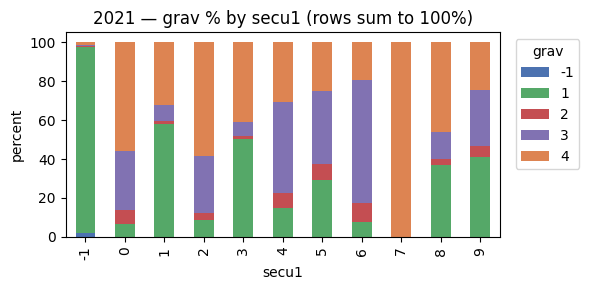

grav,-1,1,2,3,4
secu1,,,,,
-1,56,2666,6,16,47
0,0,792,831,3612,6645
1,0,44017,1118,6292,24293
2,0,2101,828,7018,13999
3,0,411,13,60,337
4,0,11,6,35,23
5,0,7,2,9,6
6,0,9,11,72,22
7,0,0,0,0,3


--- 2022 | rows: 126662 ---


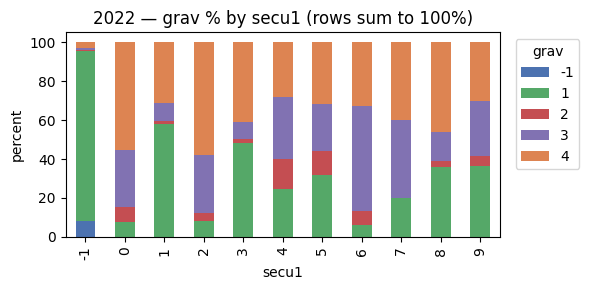

grav,-1,1,2,3,4
secu1,,,,,
-1,215,2347,6,24,87
0,0,904,978,3555,6707
1,0,42974,1190,6666,23123
2,0,1904,873,6737,13137
3,0,375,13,67,319
4,0,25,16,32,29
5,0,8,3,6,8
6,0,6,7,52,32
7,0,1,0,2,2


--- 2023 | rows: 125789 ---


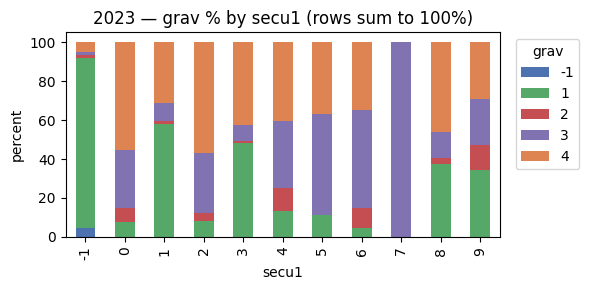

grav,-1,1,2,3,4
secu1,,,,,
-1,108,2001,26,36,121
0,1,912,863,3566,6596
1,1,42447,1159,6586,22795
2,0,1834,847,6773,12558
3,0,350,8,58,310
4,0,9,8,23,27
5,0,3,0,14,10
6,0,6,14,68,47
7,0,0,0,1,0


--- 2024 | rows: 125187 ---


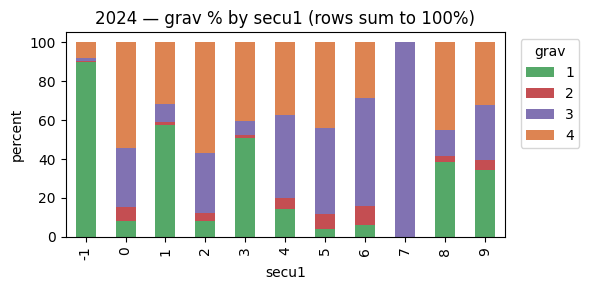

grav,1,2,3,4
secu1,,,,
-1,1891,8,27,177
0,985,905,3673,6653
1,41824,1162,6617,23316
2,1760,893,6523,12070
3,367,11,51,294
4,15,6,44,39
5,1,2,11,11
6,8,12,70,36
7,0,0,2,0


In [61]:
# build global list of grav categories present across all years (keep coded values like -1)
all_gravs = sorted({str(v) for y in years for v in dfs[y]["grav"].unique() if pd.notnull(v)})
manual_colors = ["#4C72B0", "#55A868", "#C44E52", "#8172B2", "#DD8452", "#8C8C8C", "#E24A33", "#7F7F7F"]
color_map = {g: manual_colors[i % len(manual_colors)] for i, g in enumerate(all_gravs)}

for year in years:
    df = dfs[year]
    print(f"--- {year} | rows: {len(df)} ---")

    if ("secu1" in df.columns) and ("grav" in df.columns):
        ct = pd.crosstab(df["secu1"].fillna("NA").astype(str),
                         df["grav"].fillna("NA").astype(str))
        pct = ct.div(ct.sum(axis=1).replace(0, np.nan), axis=0) * 100

        # map colors using global map; fallback color if unseen category
        col_colors = [color_map.get(col, "#BBBBBB") for col in ct.columns]

        ax = pct.plot(kind="bar", stacked=True, color=col_colors, figsize=(6,3))
        ax.set_title(f"{year} — grav % by secu1 (rows sum to 100%)")
        ax.set_xlabel("secu1")
        ax.set_ylabel("percent")
        ax.legend(title="grav", bbox_to_anchor=(1.02,1), loc="upper left")
        plt.tight_layout()
        plt.show()

        display(ct)
    else:
        plt.figure(figsize=(6,3))
        plt.text(0.5, 0.5, "secu1 or grav missing", ha="center")
        plt.title(f"{year} — secu1/grav missing")
        plt.axis("off")
        plt.show()

interpretation: 
- the plots show that the distribution of 'grav' varies across 'secu1'. 
- the table below shows that secu =1 (belt) is dominant in all years 2019-2024
- low absolute numbers in secu (3,4,5,6,7,9) 
        > keep 3 and 4 because unique 
        > 5,6,7 could be categorized to one group "Airbag/Gants(2/3RM) or if < 50 over all years> aggregate in group 8(rare)
        - "-1" and "8" keep. could be important information.


